# Лабка №4

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

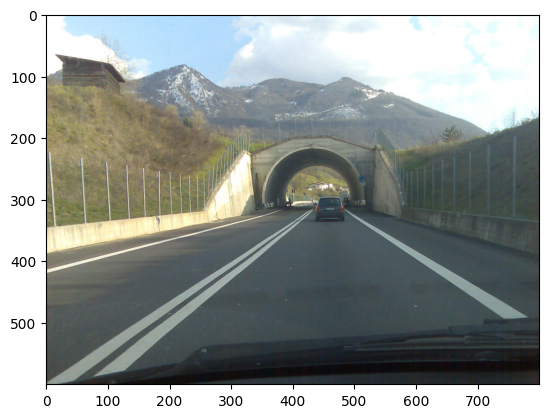

In [2]:
img = cv2.imread('imgs/dashcam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)

In [3]:
# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [4]:
# Obtain edge map
# Hint: you can use Canny edge detector with th_low = 100, th_high = 150
edges = cv2.Canny(gray, threshold1=100, threshold2=150)

# We are only interseted in the road so we will remove everything above the horizon
edges[0:350] = 0

(<Axes: title={'center': 'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

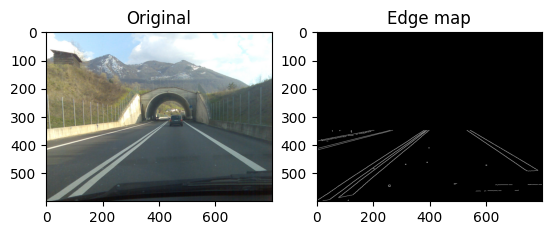

In [5]:
# Let's plot the images
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

In [6]:
# Apply Hough transform to parametrize the lines
# Hint 1: Offset resolution of 2 pixels and slope resolution of 2 degrees work well in this case
# Hint 2: A suitable value for the accumulator threshold is 190
lines = cv2.HoughLines(edges, rho=2, theta=2*np.pi/180, threshold=190)
# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]
print(lines)

[[521.           0.87266463]
 [505.           0.94247776]
 [509.           0.9075712 ]
 [495.           0.9773844 ]
 [ -7.           2.1642082 ]
 [401.           1.3264502 ]
 [513.           0.94247776]
 [499.           1.012291  ]
 [ 31.           2.0943952 ]
 [511.           0.9773844 ]]


[521.           0.87266463]
[505.           0.94247776]
[509.          0.9075712]
[495.          0.9773844]
[-7.         2.1642082]
[401.          1.3264502]
[513.           0.94247776]
[499.         1.012291]
[31.         2.0943952]
[511.          0.9773844]


Text(0.5, 1.0, 'Hough lines')

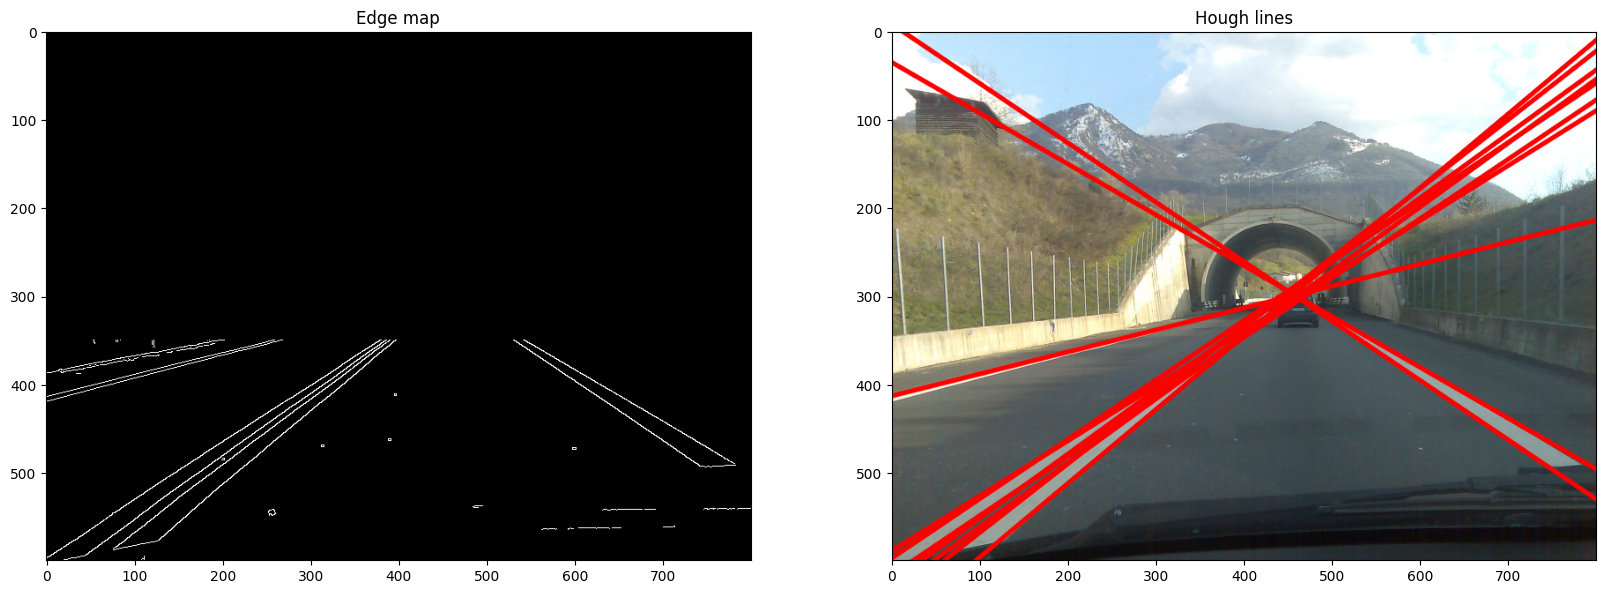

In [7]:
# Plot the resulting Hough lines
result = np.copy(img)

for line in lines:
    print(line)
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, 255, 3, cv2.LINE_AA)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(edges, cmap='gray') 
axs[0].set_title('Edge map')
axs[1].imshow(result, cmap='gray')
axs[1].set_title('Hough lines')

In [8]:
# Filter out all lines that are approximately horizontal (+/- 20 degrees).
filtered_lines = []
for line in lines:
    # Extract theta for current line (remember Hough works with radians)
    theta = line[1]
    # Keep line if theta is not horizontal
    deg = np.rad2deg(theta)
    if abs(deg) > 20 and abs(deg - 180) > 20:
        filtered_lines.append(line)

Text(0.5, 1.0, 'Hough lines')

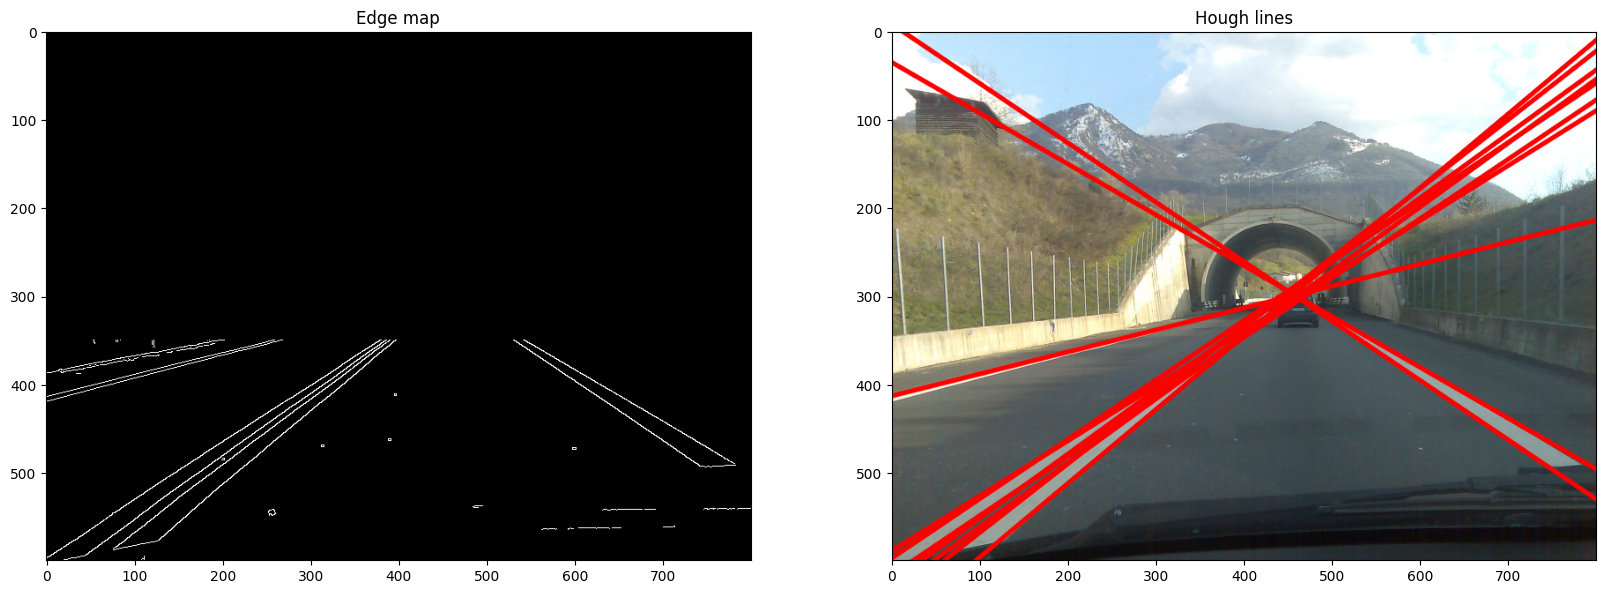

In [ ]:
# Let's plot the resulting filtered lines
result = np.copy(img)

for line in filtered_lines:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, 255, 3, cv2.LINE_AA)
    
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(edges, cmap='gray') 
axs[0].set_title('Edge map')
axs[1].imshow(result, cmap='gray')
axs[1].set_title('Hough lines')

In [10]:
# We will apply k-means clustering to refine the detected lines.
# Don't worry, we will learn about the clustering later in the course :-)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(filtered_lines)
kmeans.cluster_centers_

array([[ 31.        ,   2.09439516],
       [497.        ,   0.99483767],
       [401.        ,   1.32645023],
       [ -7.        ,   2.16420817],
       [509.5       ,   0.94247778],
       [521.        ,   0.87266463]])

Text(0.5, 1.0, 'Hough lines')

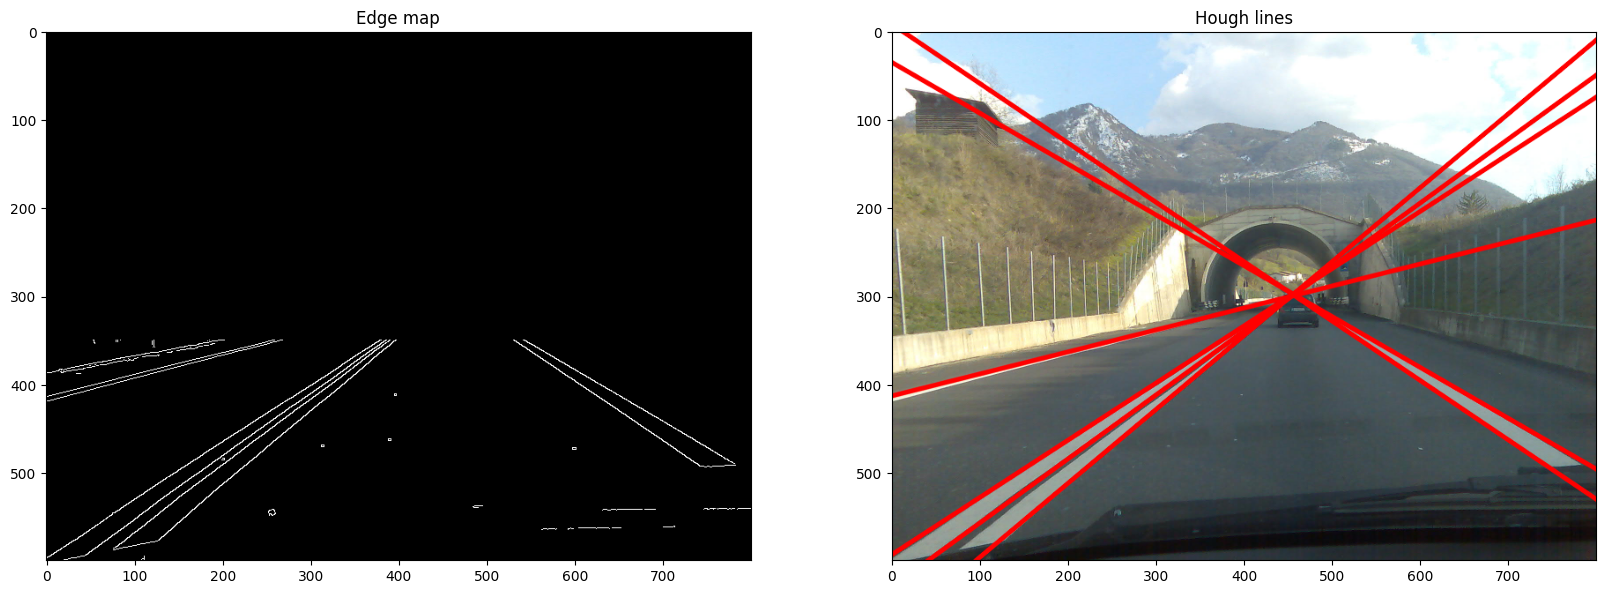

In [15]:
# Again, let's plot the resulting filtered lines
result = np.copy(img)
    
for line in kmeans.cluster_centers_:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, 255, 3, cv2.LINE_AA)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(edges, cmap='gray') 
axs[0].set_title('Edge map')
axs[1].imshow(result, cmap='gray')
axs[1].set_title('Hough lines')